In [24]:
# Imoprting Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Summary

In [25]:
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [27]:
data['Fuel_Type'] = pd.to_numeric(data['Fuel_Type'], errors='coerce')

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0


## Visualizations to explore Relationships and Patterns in the Data

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

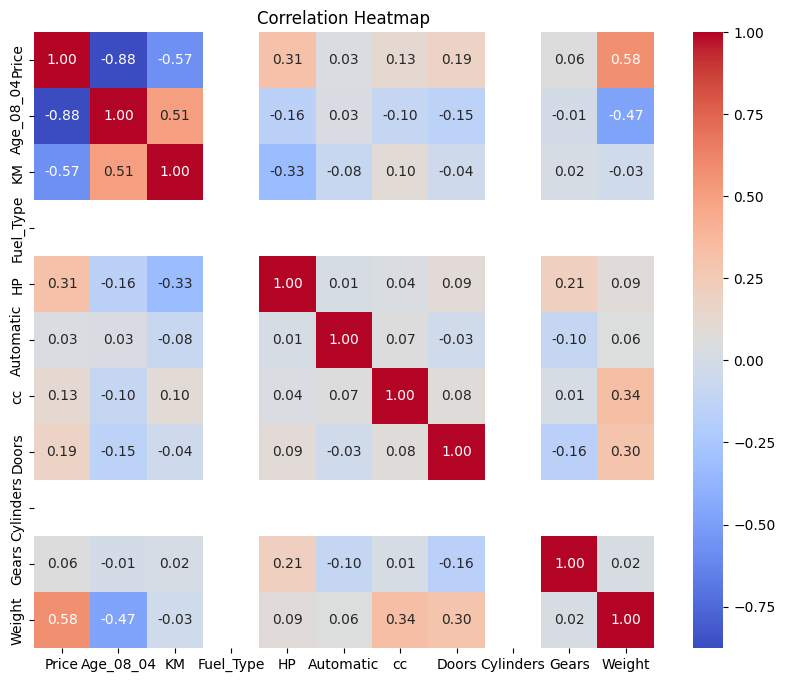

In [30]:
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

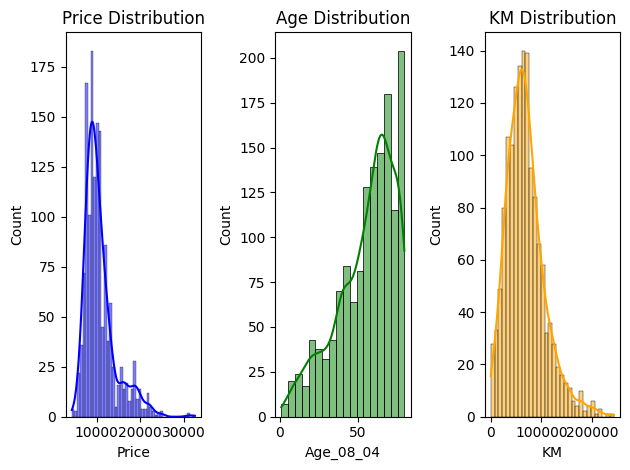

In [31]:
# Price Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Price'], kde=True, color="blue")
plt.title("Price Distribution")

# Age Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Age_08_04'], kde=True, color="green")
plt.title("Age Distribution")

# KM Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['KM'], kde=True, color="orange")
plt.title("KM Distribution")

plt.tight_layout()
plt.show()

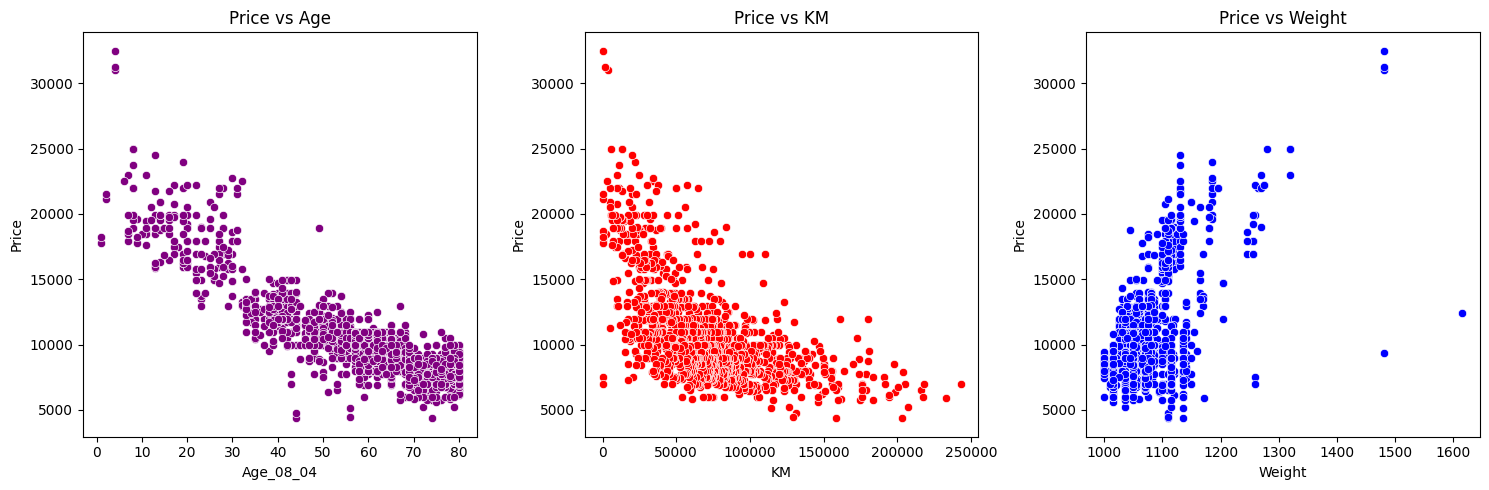

In [32]:
# Scatter plots for Price vs Age, KM, and Weight
plt.figure(figsize=(15, 5))

# Price vs Age
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['Age_08_04'], y=data['Price'], color="purple")
plt.title("Price vs Age")

# Price vs KM
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['KM'], y=data['Price'], color="red")
plt.title("Price vs KM")

# Price vs Weight
plt.subplot(1, 3, 3)
sns.scatterplot(x=data['Weight'], y=data['Price'], color="blue")
plt.title("Price vs Weight")

plt.tight_layout()
plt.show()

<ipython-input-33-20fbb759fd6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Fuel_Type'], palette="Set2")
<ipython-input-33-20fbb759fd6b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=data['Fuel_Type'], palette="Set2")


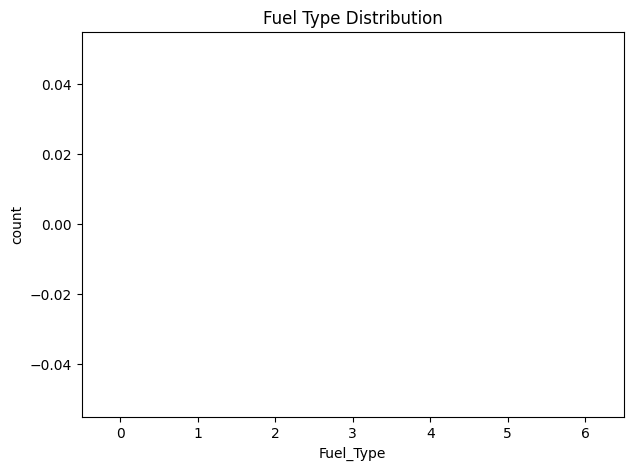

In [33]:
# Bar plot for Fuel Type
plt.figure(figsize=(7, 5))
sns.countplot(x=data['Fuel_Type'], palette="Set2")
plt.title("Fuel Type Distribution")
plt.show()


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# One-Hot Encoding for Fuel_Type
fuel_encoder = OneHotEncoder(drop="first", sparse_output=False)
fuel_encoded = fuel_encoder.fit_transform(data[['Fuel_Type']])
fuel_encoded_df = pd.DataFrame(fuel_encoded, columns=fuel_encoder.get_feature_names_out(['Fuel_Type']))

# Concatenate encoded data and drop the original column
data_preprocessed = pd.concat([data.drop('Fuel_Type', axis=1), fuel_encoded_df], axis=1)

# Feature and target separation
X = data_preprocessed.drop('Price', axis=1)
y = data_preprocessed['Price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the preprocessed data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 9), (288, 9), (1148,), (288,))

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Model 1: Linear Regression with all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions
y_pred_train_1 = model1.predict(X_train)
y_pred_test_1 = model1.predict(X_test)

# Evaluate the model
r2_train_1 = r2_score(y_train, y_pred_train_1)
r2_test_1 = r2_score(y_test, y_pred_test_1)
mse_test_1 = mean_squared_error(y_test, y_pred_test_1)
mae_test_1 = mean_absolute_error(y_test, y_pred_test_1)

# Model coefficients
coefficients_1 = pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_})

r2_train_1, r2_test_1, mse_test_1, mae_test_1, coefficients_1

(0.8659010573124349,
 0.8523452141908852,
 1970126.6288130332,
 997.0024057258138,
      Feature   Coefficient
 0  Age_08_04 -2.245783e+03
 1         KM -7.493531e+02
 2         HP  4.107746e+02
 3  Automatic  8.514096e+01
 4         cc -4.815688e+01
 5      Doors  7.176364e+00
 6  Cylinders -5.684342e-14
 7      Gears  1.180453e+02
 8     Weight  1.044201e+03)

## Lasso and Ridge methods

In [36]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Split data only once
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso MSE:", lasso_mse)
print("Ridge MSE:", ridge_mse)

Lasso MSE: 1970167.5456595074
Ridge MSE: 1970151.8337241486
